# Sentiment analysis of text samples for misinformation detection:
---

In [1]:
from text_parse import parse_file, parse_file_param
import linguistic_analysis
import function_helpers
import time
import matplotlib.pyplot as plt
import skfuzzy 
import math

Let's try tf-idf for simple data set:

In [ ]:
start_time = time.time()

rows = ["minus plus", "cosine sin", "one two three"]

data_to_analyse = ["hello world", "hello Valentyn", "vaccine trump vaccine clinton public plus minus one ctng pew"]
result = linguistic_analysis.analyse_tfidf(rows, data_to_analyse)

end_time = time.time()
execution_time = end_time - start_time

print(result)
print(f"Execution time: {execution_time} seconds")

[0.        0.        1.9028523]
Execution time: 0.0010020732879638672 seconds


Let's try tf-idf on some real data:

In [ ]:
start_time = time.time()

rows = parse_file("example.csv", 1, 10000)

data_to_analyse = ["hello world", 
                   "morning hello Valentyn", 
                   "In recent years, there has been a growing debate surrounding the safety and efficacy of vaccines. While mainstream media and government health agencies continue to promote vaccination as a crucial public health measure, a closer examination reveals a different story—one shrouded in secrecy and deception.",
                   "Dysgraphia is a neurological condition that affects a student's ability to express themselves in writing. It can manifest in various ways, including illegible handwriting, inconsistent letter formation, difficulty with spelling and grammar, and slow or laborious writing speed. Students with dysgraphia may"]
result = linguistic_analysis.analyse_tfidf_cosine(rows, data_to_analyse, True)

result_normalized = [function_helpers.normalize_e(value) for value in result] 

end_time = time.time()
execution_time = end_time - start_time

print(result)
print(f"Execution time: {execution_time} seconds")

[0.00664725 0.00664725 0.02434444 0.02215749]
Execution time: 4.710449457168579 seconds


Let's plot that result using matplotlib:

Text(0, 0.5, 'coefficient')

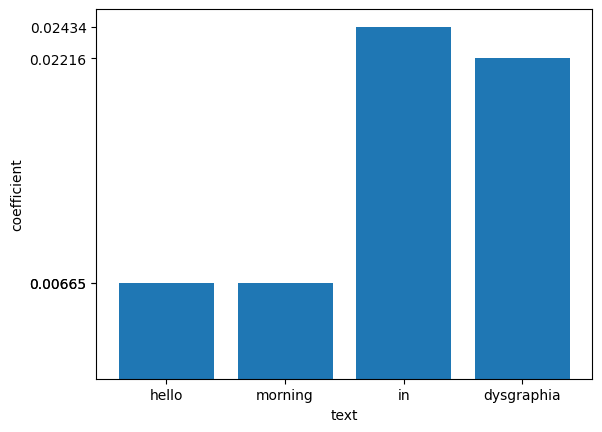

In [ ]:
tags = [text.lower().split()[0] for text in data_to_analyse]
plt.bar(tags, result)
plt.xticks(tags)
plt.yticks(result) 
plt.xlabel('text')
plt.ylabel('coefficient')

## Usage of n-grams technique:
--- 
*Lets use n-grams*

In [ ]:
rows = parse_file("DataSet_Misinfo_FAKE.csv", 1, 40000)

data_to_analyse = ["hello world hello", 
                   "Donald Trump campaign", 
                   "In recent years, there has been a growing debate surrounding the safety and efficacy of vaccines. While mainstream media and government health agencies continue to promote vaccination as a crucial public health measure, a closer examination reveals a different story—one shrouded in secrecy and deception.",
                   "Dysgraphia is a neurological condition that affects a student's ability to express themselves in writing. It can manifest in various ways, including illegible handwriting, inconsistent letter formation, difficulty with spelling and grammar, and slow or laborious writing speed. Students with dysgraphia may"]

result = linguistic_analysis.analyse_n_grams(rows, data_to_analyse, 3, True)

print(result)

[0.         0.00039793 0.00088981 0.00039793]


Text(0, 0.5, 'coefficient')

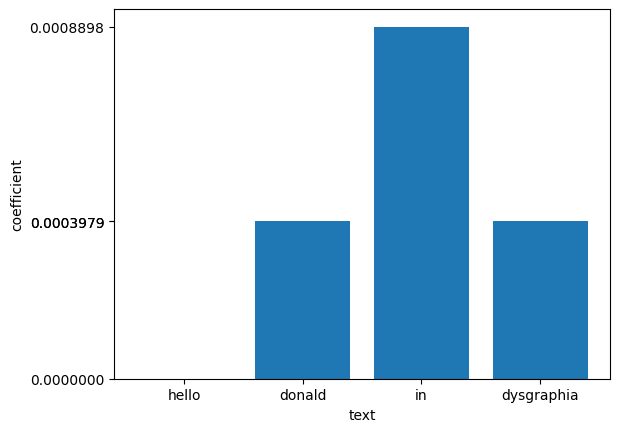

In [ ]:
tags = [text.lower().split()[0] for text in data_to_analyse]
plt.bar(tags, result)
plt.xticks(tags)
plt.yticks(result) 
plt.xlabel('text')
plt.ylabel('coefficient')

## Fuzzy logic

In [8]:
rows = parse_file_param("covid-19_vaccine_tweets_with_sentiment_fixed.csv", 2, 5000, 1, "1")

data_to_analyse = ["hello world hello", 
                   "Donald Trump campaign", 
                   "In recent years, there has been a growing debate surrounding the safety and efficacy of vaccines. While mainstream media and government health agencies continue to promote vaccination as a crucial public health measure, a closer examination reveals a different story—one shrouded in secrecy and deception.",
                   "Dysgraphia is a neurological condition that affects a student's ability to express themselves in writing. It can manifest in various ways, including illegible handwriting, inconsistent letter formation, difficulty with spelling and grammar, and slow or laborious writing speed. Students with dysgraphia may"]

result = linguistic_analysis.analyse_tfidf_cosine(rows, data_to_analyse, True)

print(result)

[0.0212451  0.01583516 0.06175819 0.04189589]


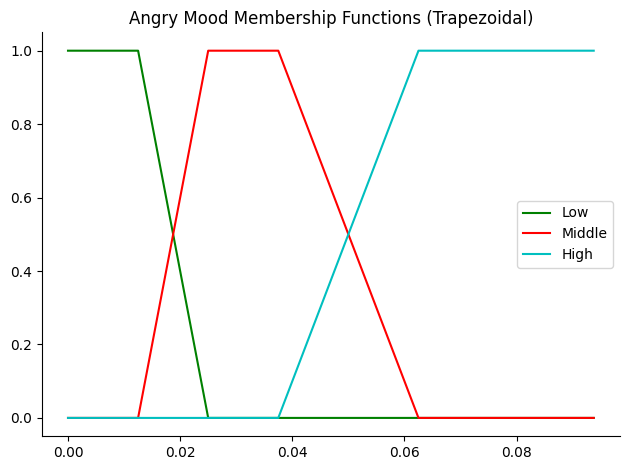

In [1]:
from fuzzy_analysis import calculate_fuzzy_param

calculate_fuzzy_param(0, 0.1)

## TODO:

- improve idf by selecting from train data 
- ! fuzzy logic 
- train nn on data 
- kohonen maps 
- diagram +
- think about cosinus +
- main file in jupiter notebook +
- n-grams (2, 3 words items) +
- telegram bot 
- poetry file generate 
- remove common words on data to analyse 